# Problem Statement

The objective of this analysis is to examine how the **Type II error rate** of an independent two-sample *t*-test changes as the true difference between population means increases.

**Problem:**

> "Generate two samples of size 100, one from the standard normal distribution and one from a normal distribution with mean difference `d` and standard deviation 1. For each mean difference `d = 0, 0.1, 0.2, ..., 1.0`, repeat the simulation 1,000 times, run an independent two-sample *t*-test at the 5% significance level, and record the proportion of times the null hypothesis is not rejected. Plot this proportion against `d` and explain how the Type II error rate changes as the difference in means increases."

To solve this, we will:

- Define a sequence of mean differences:

$$
d = 0, 0.1, 0.2, \ldots, 1.0
$$

- For each value of `d`, perform **1,000 independent simulation runs**, where each run consists of:
  - Generating two independent samples of size **n = 100**:
    - One sample from the standard normal distribution, $N(0, 1)$.
    - One sample from the normal distribution, $N(d, 1)$.
  - Conducting an **independent two-sample t-test** to test the hypotheses:

$$
H_0: \mu_1 = \mu_2
$$

$$
H_1: \mu_1 \ne \mu_2
$$

  - Using a significance level of:

$$
\alpha = 0.05
$$

- Record whether the null hypothesis is **not rejected** in each simulation run (i.e., when the p-value is greater than or equal to 0.05).

- For each value of `d`, calculate the **proportion of simulations** in which the null hypothesis is not rejected, providing an empirical estimate of the **Type II error rate**.

- Plot the estimated Type II error rate as a function of the mean difference `d`.

- Interpret the results, explaining how and why the Type II error rate changes as the true difference between population means increases.

The goal is to develop an empirical understanding of the relationship between **effect size**, **statistical power**, and the likelihood of committing a **Type II error** in hypothesis testing.


----

In [12]:
# Libraries Required

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

----

## Type I vs Type II Error

In the process of making a decision regarding the null hypothesis in hypothesis testing, two types of error may occur.

- If the null hypothesis is rejected even though it is true, this is known as a **Type I error**.  
  This represents a *false positive* result. The probability of a Type I error occurring is controlled by the **significance level**, denoted by $\alpha$.  
  For this problem, we use:

  $$
  \alpha = 0.05
  $$

  This means that, under repeated testing when the null hypothesis is true, we expect it to be incorrectly rejected in approximately 5% of cases.

- If the null hypothesis is **not rejected** even though it is false, this is known as a **Type II error**.  
  This represents a *false negative* result. The probability of making a Type II error is denoted by $\beta$.

For this problem, the null hypothesis is defined as:

$$
H_0: \mu_1 = \mu_2
$$


For this problem, when $d = 0$, the two populations—namely the standard normal distribution and the normal distribution with mean difference—have identical means, and the null hypothesis is true, as both populations are drawn from a standard normal distribution.

As $d$ increases above zero, the mean of the second population, that is, the normal distribution with mean $d$ and unit variance, becomes larger than that of the first population, which is the standard normal distribution with mean 0. In this case, the null hypothesis is false and should be rejected by the test.

If, under this scenario, the test fails to detect the difference between the two population means and does not reject the null hypothesis, a **Type II error** has occurred.

The **power** of a test, refers to the probability that when the null hypothesis is false, it correctly gets rejected. It can be expressed as:

$$
\text{Power} = 1 - \beta
$$


As the true mean difference $d$ increases, the test becomes more likely to detect a difference between the two populations. Consequently, the **Type II error rate is expected to decrease**, while the **power of the test is expected to increase**.



References for this Section:
1. Type I vs Type II Error - https://www.geeksforgeeks.org/data-science/type-i-and-type-ii-errors/
2. Type I vs Type II Error - https://www.analyticsvidhya.com/blog/2024/07/type-i-and-type-ii-errors/
3. Type I vs Type II Error - https://medium.com/@mail2rajivgopinath/key-statistics-terms-12-type-1-and-type-2-errors-966dcf4f52fb
4. Type I vs Type II Error - https://www.geeksforgeeks.org/software-testing/understanding-hypothesis-testing/
5. Type I vs Type II Error - https://www.kameleoon.com/blog/what-are-type-i-and-type-ii-errors
6. Type I vs Type II Error - https://www.statsig.com/perspectives/type-1-errors-and-type-2-errors-explained
7. Alpha Formula - https://www.statsig.com/perspectives/type-one-error
8. Null Hyptothesis - https://www.geeksforgeeks.org/maths/null-hypothesis/
9. Power Formula - https://towardsdatascience.com/type-i-ii-errors-and-sample-size-calculation-in-hypothesis-testing-760dae42a065/

----

## Independent Sample *t*-Test

To allow for a statistical assessment of whether there is a significant difference between the means of the standard normal distribution and the normal distribution with a mean difference, an independent two-sample *t*-test is used. In this analysis, the test is applied to compare the means of two samples drawn from normal distributions with identical variances but potentially different means.

The null and alternative hypotheses are defined as:

$$
H_0: \mu_1 = \mu_2
$$

$$
H_1: \mu_1 \ne \mu_2
$$

Applying a significance level of $\alpha = 0.05$, a two-sided test is performed. If the resulting *p*-value is less than $\alpha = 0.05$, the null hypothesis is rejected.


The assumptions of the *t*-test are that the samples are normally distributed and that the samples are independent. In this experiment, these assumptions are satisfied, as observations are generated independently from normal distributions. Welch’s two-sample *t*-test is used, which does not require the assumption of equal population variances.


References for this section
1. Sample T-Test - https://www.statology.org/two-sample-t-test/
2. Sample T-Test - https://www.jmp.com/en/statistics-knowledge-portal/t-test/two-sample-t-test
3. Sample T-Test - https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php
4. Sample T-Test - https://www.geeksforgeeks.org/r-language/what-is-the-differences-between-the-two-sample-t-test-and-paired-t-test/
5. Sample T-Test - https://www.qualitygurus.com/two-sample-t-test/
6. Sample T-Test - https://www.geeksforgeeks.org/machine-learning/how-to-conduct-a-two-sample-t-test-in-python/
7. Sample T-Test - https://www.statology.org/two-sample-t-test-python/
8. Sample T-Test - https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests
9. Sample T-Test - https://www.jonathanbossio.com/post/two-sample-t-test-with-python
10. Alternative Hypothesis - https://www.geeksforgeeks.org/maths/alternative-hypothesis-definition-types-and-examples/
11. Alternative Hypothesis - https://courses.lumenlearning.com/introstats1/chapter/null-and-alternative-hypotheses/

---

# Generating Samples

In [13]:
np.random.seed(1)  # Set random seed for reproducibility

n = 100  # Set sample size to 100

d_values = np.arange(0, 1.1, 0.1)  # Using numpy.arange to create Mean differences from 0 to 1 in increments of 0.1

d = 0.5  # Mean difference used for this example

# Group A: N(0, 1), i.e. standard normal distribution
# 0 is the mean, 1 is the standard deviation, n is the sample size
group_a = np.random.normal(0, 1, n)  

# Group B: N(d, 1), i.e. normal distribution with mean d and standard deviation 1
# d is the mean, 1 is the standard deviation, n is the sample size
group_b = np.random.normal(d, 1, n)  



References for this Section:

1. Random Seed for Reproducibility - https://www.w3schools.com/python/ref_random_seed.asp
2. Random Seed for Reproducibility - https://www.geeksforgeeks.org/python/random-seed-in-python/
3. Random Seed for Reproducibility - https://medium.com/data-science/random-seeds-and-reproducibility-933da79446e3
4. Random Seed for Reproducibility - https://www.analyticsvidhya.com/blog/2021/12/what-does-numpy-random-seed-do/
5. Using NP.Arange to create mean differences - https://www.geeksforgeeks.org/python/numpy-arrange-in-python/
6. Using NP.Arange to create mean differences - https://numpy.org/devdocs/reference/generated/numpy.arange.html
7. Using NP.Arange to create mean differences - https://www.datacamp.com/doc/numpy/arange
8. Using NP.Arange to create mean differences - https://realpython.com/how-to-use-numpy-arange/
9. Using NP.Arange to create mean differences - https://www.analyticsvidhya.com/blog/2024/01/know-all-about-numpy-arange-in-python/
10. Numpy Random Normal for creating Groups - https://numpy.org/devdocs/reference/random/generated/numpy.random.normal.html
11. Numpy Random Normal for creating Groups - https://www.datacamp.com/doc/numpy/random-normal
12. Numpy Random Normal for creating Groups - https://www.geeksforgeeks.org/numpy/normal-distribution-in-numpy/
13. Numpy Random Normal for creating Groups - https://realpython.com/numpy-random-normal/
14. Numpy Random Normal for creating Groups - https://www.w3schools.com/python/numpy/numpy_random_normal.asp

---

# Running T-Tests

In [14]:
alpha = 0.05 # Setting significance level to 0.05

# Creating t-test using scipy.stats
# Assigning the statistic output to be called t-statistic: calculated t-statistic value
# Assigning the p-value output to be called p-value: probability of observing the data given that the null hypothesis is true
# group_a and group_b are the two independent samples being compared
# equal_var=False indicates that we are not assuming equal population variances (Welch's t-test)
t_statistic, p_value = stats.ttest_ind(group_a, group_b, equal_var=False) 

reject_null = p_value < alpha # Setting rule to determine if we reject the null hypothesis based on p-value and alpha level
reject_null, p_value # Output whether we reject the null hypothesis and the p-value

(True, 8.07052200864634e-06)

References for this Section
1. T-Test Set Up - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
2. T-Test Set Up - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.ttest_ind.html
3. T-Test Set Up - https://www.geeksforgeeks.org/data-science/t-test/
4. T-Test Set Up - https://www.w3schools.com/python/scipy/scipy_statistical_significance_tests.php
5. T-Test Set Up - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html 

---

# Estimating the Type II Error Rate

To estimate the Type II error rate, the hypothesis testing procedure is repeated multiple times for each value of the mean difference $d$. For each simulation run, an independent two-sample *t*-test is performed and it is recorded whether the null hypothesis is not rejected.

For a given value of $d$, the Type II error rate is estimated as the proportion of simulation runs in which the null hypothesis is not rejected, despite the presence of a true difference in population means. This provides a Monte Carlo estimate of the probability of committing a Type II error for each value of $d$.


In [15]:
num_simulations = 1000  # Number of repetitions for each value of d

type_ii_error_rates = [] # Create empty list to store Type II error rates

for d in d_values: # Using a for loop to iterate through each value of d
    fail_to_reject_count = 0 # Setting counter to track number of times we fail to reject the null hypothesis

    for _ in range(num_simulations): # Creating an inner loop to run the simulations
        # Group A: N(0, 1), i.e. standard normal distribution
        # 0 is the mean, 1 is the standard deviation, n is the sample size
        group_a = np.random.normal(0, 1, n)
        # Group B: N(d, 1), i.e. normal distribution with mean d and standard deviation 1
        # d is the mean, 1 is the standard deviation, n is the sample size
        group_b = np.random.normal(d, 1, n)
        # Creating t-test using scipy.stats
        # Assigning the statistic output to be called t-statistic: calculated t-statistic value
        # Assigning the p-value output to be called p-value: probability of observing the data given that the null hypothesis is true
        # group_a and group_b are the two independent samples being compared
        # equal_var=False indicates that we are not assuming equal population variances (Welch's t-test)
        t_statistic, p_value = stats.ttest_ind(group_a, group_b, equal_var=False)

        if p_value >= alpha: # If p-value is greater than or equal to alpha, we fail to reject the null hypothesis
            fail_to_reject_count += 1 # Increment the counter by 1 as we failed to reject the null hypothesis

    type_ii_error_rate = fail_to_reject_count / num_simulations # Calculating Type II error rate as the proportion of times we failed to reject the null hypothesis
    type_ii_error_rates.append(type_ii_error_rate) # Appending the calculated Type II error rate to the list

### References for this section
1. Monte Carlo Simulation: https://aws.amazon.com/what-is/monte-carlo-simulation/
2. Steps in the Monte Carlo Simulation - https://bookdown.org/manuele_leonelli/SimBook/steps-of-monte-carlo-simulation.html
3. Steps in the Monte Carlo Simulation - https://blog.minitab.com/en/blog/the-4-simple-steps-for-creating-a-monte-carlo-simulation-with-engage-or-workspace
4. Creating an Empty List - https://www.geeksforgeeks.org/python/declare-an-empty-list-in-python/
5. For Loops - https://www.geeksforgeeks.org/python/loops-in-python/
6. For Loops - https://www.w3schools.com/python/python_for_loops.asp
7. For Loops - https://realpython.com/python-for-loop/
8. For Loops - https://wiki.python.org/moin/ForLoop
9. Nested Loops - https://www.geeksforgeeks.org/python/python-nested-loops/
10. Nested Loops - https://realpython.com/nested-loops-python/
11. Nested Loops - https://www.w3schools.com/python/gloss_python_for_nested.asp
12. Nested Loops - https://medium.com/@dnaresh2323/nested-loops-pattern-printing-in-python-8d3503340f1d
13. Nested Loops - https://pynative.com/python-nested-loops/
14. T-Test Set Up - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.ttest_ind.html
15. T-Test Set Up - https://www.geeksforgeeks.org/data-science/t-test/
16. T-Test Set Up - https://www.w3schools.com/python/scipy/scipy_statistical_significance_tests.php
17. T-Test Set Up - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html 
18. Calculating Type II Error Rate - https://www.geeksforgeeks.org/machine-learning/false-positives-and-false-negatives/
19. Calculating Type II Error Rate - https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/
20. Calculating Type II Error Rate - https://www.geeksforgeeks.org/data-science/type-i-and-type-ii-errors/
21. Calculating Type II Error Rate - https://www.analyticsvidhya.com/blog/2024/07/type-i-and-type-ii-errors/
22. Calculating Type II Error Rate - https://towardsdatascience.com/type-i-ii-errors-and-sample-size-calculation-in-hypothesis-testing-760dae42a065/
23. Calculating Type II Error Rate - https://www.codecademy.com/learn/scipy/modules/dspath-hypothesis-testing/cheatsheet
24. Calculating Type II Error Rate - https://www.scribbr.com/statistics/type-i-and-type-ii-errors/
25. Calculating Type II Error Rate - https://www.analyticsvidhya.com/blog/2021/04/confusion-matrix-detailed-intuition-and-trick-to-learn/
26. Calculating Type II Error Rate - https://medium.com/@ChandraPrakash-Bathula/machine-learning-concept-27-tpr-tnr-fpr-fnr-metrics-in-machine-learning-6adb6b1b860d
27. Calculating Type II Error Rate - https://www.geeksforgeeks.org/machine-learning/metrics-for-machine-learning-model/

----

# Plotting

To visualise how the Type II error rate changes as the true mean difference increases, the estimated Type II error rate is plotted against the values of $d$. This provides a clear view of how often the test fails to reject the null hypothesis as the effect size increases.


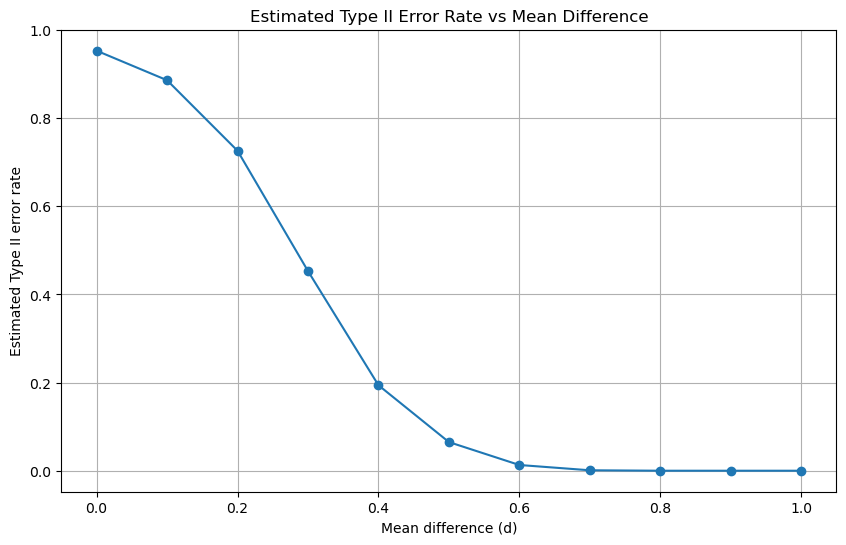

In [16]:
# Setting figure size for better visibility
# 14 is the figure number, figsize sets the size of the plot
# 10 is the width, 6 is the height
plt.figure(14, figsize=(10, 6)) 
# Plotting the Mean difference (d) on the x-axis and Estimated Type II error rate on the y-axis
# 'o' marker is used to denote each data point
plt.plot(d_values, type_ii_error_rates, marker='o')
plt.xlabel("Mean difference (d)") # Setting x-axis label to "Mean difference (d)"
plt.ylabel("Estimated Type II error rate") # Setting y-axis label to "Estimated Type II error rate"
plt.title("Estimated Type II Error Rate vs Mean Difference") # Setting title of the plot to "Estimated Type II Error Rate vs Mean Difference"
plt.grid(True) # Enabling grid for better readability
plt.show() # Displaying the plot

### References for this section
1. Plotting - Matplotlib - https://matplotlib.org/
2. Plotting - Matplotlib - https://www.w3schools.com/python/matplotlib_pyplot.asp
3. Plotting - Matplotlib - https://www.geeksforgeeks.org/python/python-introduction-matplotlib/
4. Plotting - Matplotlib - https://www.datacamp.com/tutorial/matplotlib-tutorial-python
5. Plotting - Matplotlib - https://realpython.com/python-matplotlib-guide/
6. Plot Title/ Labels/ Ticks - https://www.w3schools.com/python/matplotlib_labels.asp
7. Plot Title/ Labels/ Ticks - https://www.geeksforgeeks.org/python/matplotlib-pyplot-title-in-python/
8. Adding Grid Lines on Y-Axis - https://www.w3schools.com/python/matplotlib_grid.asp
9. Adding Grid Lines on Y-Axis - https://www.geeksforgeeks.org/python/grids-in-matplotlib/
10. Plot Size - https://www.geeksforgeeks.org/python/change-plot-size-in-matplotlib-python/

----

# Interpretation of Results